In [1]:
import wandb

api = wandb.Api()

In [2]:
from logistic_regression import logistic_regression

In [3]:
artifact = api.artifact("Verbalized Multistep Confidence/multistep-HotpotQA-gpt-4.1:latest")
df = artifact.get("table").get_dataframe()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb:   2 of 2 files downloaded.  


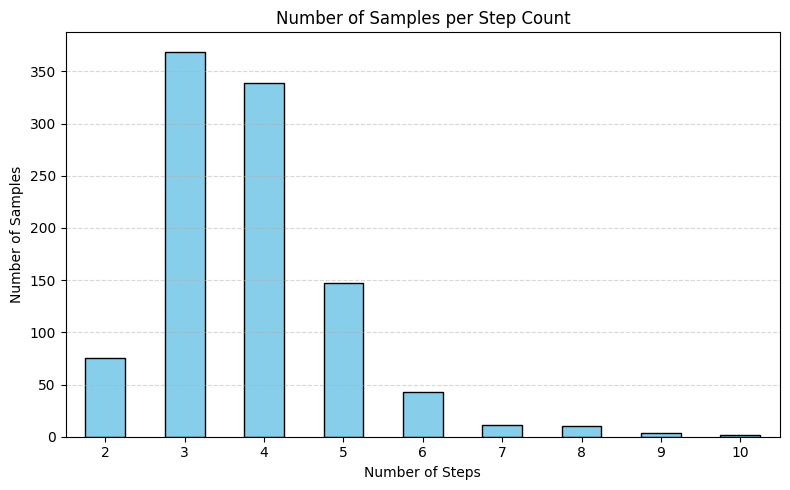

In [4]:
import matplotlib.pyplot as plt

step_counts = df["num_steps"].value_counts().sort_index()

# Plot
plt.figure(figsize=(8, 5))
step_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Number of Samples per Step Count")
plt.xlabel("Number of Steps")
plt.ylabel("Number of Samples")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [5]:
X = df[["min_confidence", "max_confidence", "final_confidence", "num_steps", "confidence", "mean_confidence"]]
y = df["gpt_eval"]

In [6]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import wandb

from eval import evaluate

# Simple train-test split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Train logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities and labels
probs_val = model.predict_proba(X_val)[:, 1]
preds_val = (probs_val >= 0.5).astype(int)

In [7]:
import pandas as pd

feature_weights = pd.Series(model.coef_[0], index=X.columns)
print(feature_weights.sort_values(ascending=False))

eval1 = evaluate(y_val, probs_val, preds_val)

confidence          1.945620
final_confidence    1.305910
min_confidence      1.288959
mean_confidence     0.591554
max_confidence      0.204317
num_steps          -0.097907
dtype: float64


In [8]:
X = df[["confidence"]]
y = df["gpt_eval"]

In [9]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import wandb

from eval import evaluate

# Simple train-test split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Train logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities and labels
probs_val = model.predict_proba(X_val)[:, 1]
preds_val = (probs_val >= 0.5).astype(int)

In [10]:
import pandas as pd
from eval import evaluate


feature_weights = pd.Series(model.coef_[0], index=X.columns)
print(feature_weights.sort_values(ascending=False))

eval2 = evaluate(y_val, probs_val, preds_val)

confidence    3.199394
dtype: float64


In [11]:
X = df[["final_confidence"]]
y = df["gpt_eval"]

In [12]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import wandb

from eval import evaluate

# Simple train-test split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Train logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities and labels
probs_val = model.predict_proba(X_val)[:, 1]
preds_val = (probs_val >= 0.5).astype(int)

In [13]:
import pandas as pd
from eval import evaluate


feature_weights = pd.Series(model.coef_[0], index=X.columns)
print(feature_weights.sort_values(ascending=False))

eval3 = evaluate(y_val, probs_val, preds_val)

final_confidence    4.428094
dtype: float64


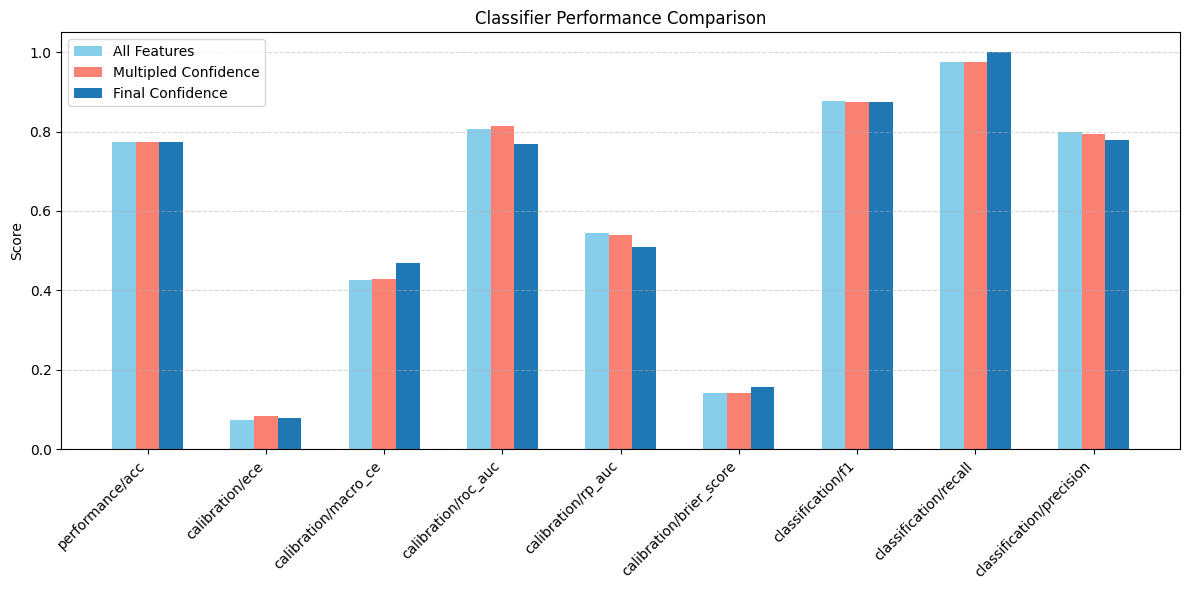

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Convert to lists
metrics = list(eval1.keys())
values1 = [eval1[m] for m in metrics]
values2 = [eval2[m] for m in metrics]
values3 = [eval3[m] for m in metrics]

# Plot
x = np.arange(len(metrics))
width = 0.2

plt.figure(figsize=(12, 6))
plt.bar(x - width, values1, width, label='All Features', color='skyblue')
plt.bar(x, values2, width, label='Multipled Confidence', color='salmon')
plt.bar(x + width, values3, width, label='Final Confidence')

# Styling
plt.ylabel('Score')
plt.title('Classifier Performance Comparison')
plt.xticks(x, metrics, rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [20]:
artifact = api.artifact("Verbalized Multistep Confidence/cot-HotpotQA-gpt-4.1:latest")
df = artifact.get("table").get_dataframe()

wandb:   2 of 2 files downloaded.  


In [21]:
X = df[["confidence"]]
y = df["gpt_eval"]

In [22]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import wandb

from eval import evaluate

# Simple train-test split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Train logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities and labels
probs_val = model.predict_proba(X_val)[:, 1]
preds_val = (probs_val >= 0.5).astype(int)

In [23]:
import pandas as pd
from eval import evaluate


feature_weights = pd.Series(model.coef_[0], index=X.columns)
print(feature_weights.sort_values(ascending=False))

eval4 = evaluate(y_val, probs_val, preds_val)

confidence    4.060921
dtype: float64


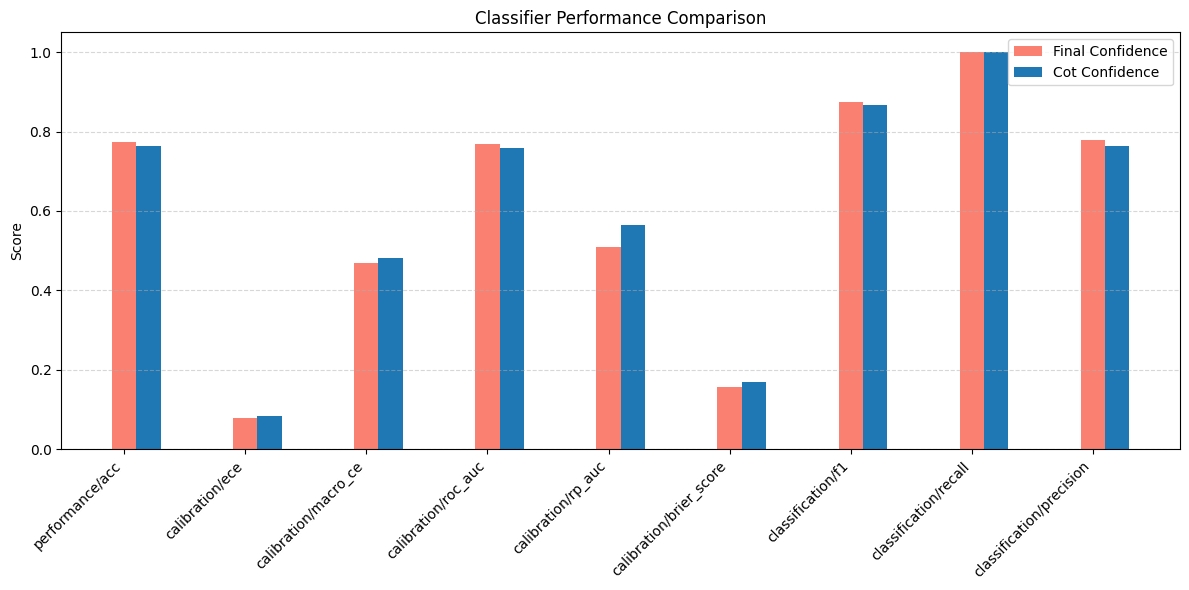

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Convert to lists
metrics = list(eval1.keys())
values1 = [eval1[m] for m in metrics]
values2 = [eval3[m] for m in metrics]
values3 = [eval4[m] for m in metrics]

# Plot
x = np.arange(len(metrics))
width = 0.2

plt.figure(figsize=(12, 6))
#plt.bar(x - width, values1, width, label='All Features', color='skyblue')
plt.bar(x, values2, width, label='Final Confidence', color='salmon')
plt.bar(x + width, values3, width, label='Cot Confidence')

# Styling
plt.ylabel('Score')
plt.title('Classifier Performance Comparison')
plt.xticks(x, metrics, rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()